0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0


ValueError: x and y must have same first dimension

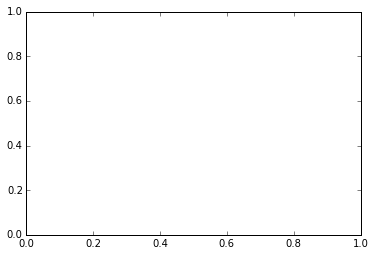

In [24]:
%matplotlib inline
from math import sin, cos, pi, atan
import csv
import matplotlib.pyplot as plt
import random

Cd = 0.17
A = 1.15
roll_resist_co = 0.0025
mass = 285 #kg
g = 9.8 #kg-m/s^2
battery_percentage = 100 #percentage
battery_capactiy = 4.5 # kwh

def power(velocity, incline, accel=0): # Calculates instantaneous power given acceleration, velocity, and incline
    force = .5 * 1.225 * Cd * A * velocity**2 + roll_resist_co*mass*g*cos(incline) + mass*g*sin(incline) + mass*accel
    power = force * velocity
    return power
#CURRENTLY ISSUE WITH OPENING TERRAIN FILE!
def energy(velocity, terrain): 
    # Takes in velocity (constant) and terrain file, outputs - (list of total energy used up to that point, power readings, distance readings, total energy value)
    terrain_reader = csv.reader(open(terrain))
    e, last_distance, last_elevation = 0, 0, 0
    energy_readings = []
    power_readings = []
    distance_readings = [distance[0] for distance in terrain_reader][1:]
    
    for row in terrain_reader:
        try: 
            d = float(row[0])
            if d == 0:
                last_elevation = float(row[1])
            else:
                p = power(velocity, atan((float(row[1]) - last_elevation)/(float(row[0])-last_distance))) #calculates elevation angle
                power_readings.append(p)
                time = (float(row[0]) - last_distance)/velocity
                e += p * (time)
                last_elevation = float(row[1])  
                last_distance = float(row[0])
        except ValueError:
            
            continue
        energy_readings.append(e/3600000)
    return energy_readings, power_readings, distance_readings, e


"""def energy_sim(velocity_range, terrain):
    energy_readings = []
    power_readings = []
    terrain_reader = csv.reader(open(terrain))
    distance_readings = [distance[0] for distance in terrain_reader[1:]]
    
    for i in range(100):
        energy(random.choice(velocity_range), terrain, energy_readings, power_readings)
    return energy_readings, power_readings, distance_readings """


"""def instantaneous_power_data(velocity, terrain):
    distance_list = []
    power_list = []
    total_distance = 0
    terrain_reader = csv.reader(open(terrain))
    p, last_distance, last_elevation = 0, 0, 0
    for row in terrain_reader:
        try: 
            d = float(row[0])
            if d == 0:
                last_elevation = float(row[1])
            else:
                p = power(random.choice(velocity), atan((float(row[1]) - last_elevation)/(float(row[0])-last_distance))) #calculates power
                total_distance += (float(row[0]) - last_distance)
                last_elevation = float(row[1])  
                last_distance = float(row[0])
                distance_list.append(total_distance)
                power_list.append(p)
            except ValueError:
                continue
    return distance_list, power_list """ #returns a list of distance travelled vs power used at particular distance; correlated by index

"""def plot_instantaneous_power(velocity, terrain):
    distance, power = instantaneous_power(velocity, terrain)
    plt.plot(distance, power) #displays a graph """

"""def run_energy(range,terrain_file):
    energy_readings, power_readings, distance_readings = energy(range, terrain_file)
    plt.hist(x)"""

def plot_energy(range, terrain_file): #Plots total energy used over an entire test for a range of test velocities
    energies = []
    vs = []
    for v in range:
        vs.append(v)
        energy_val, power, distance, total_energy = energy(v, terrain_file)
        #energies.append(energy_val[len(energy_val) - 1])
        print(len(energy_val))
    plt.plot(vs, energies)
    
def plot_energy_time(velocity, terrain_file): #Plots battery energy over distance
    energy_val, power, distance, total_energy = energy(velocity, terrain_file)
    plt.plot([battery_capacity - i for i in energy_val], distance)
    
def plot_energy_time_percentage(velocity, terrain_file): #Plots batter percentage over distance
    energy_val, power, distance, total_energy = energy(v, terrain_file)
    plt.plot([((battery_capacity - i) / battery_capacity) * 100 for i in energy_val], distance[1:])
    
plot_energy(range(100), "terrain1.csv")
#plot_energy_time(10, "terrain1.csv")
#plot_energy_time_percentage(10, "terrain1.csv")